Shape of images data: (1797, 8, 8)
Shape of target labels: (1797,)


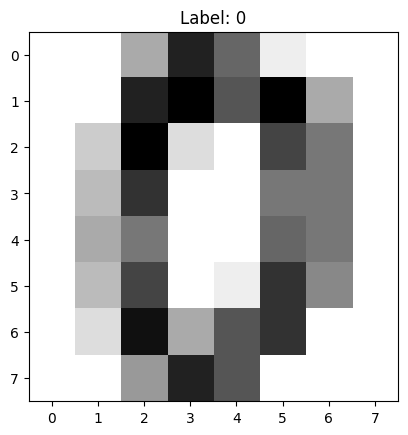

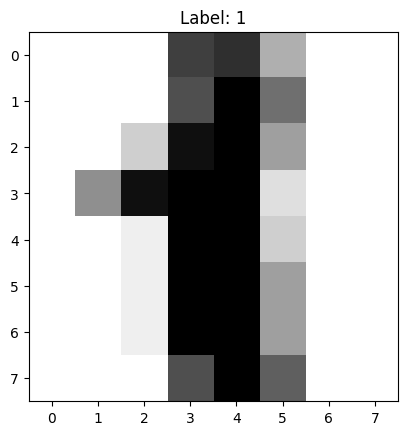

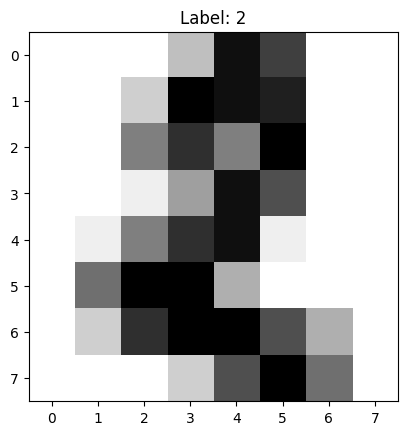

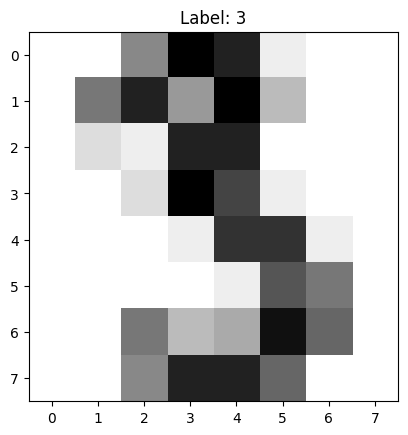

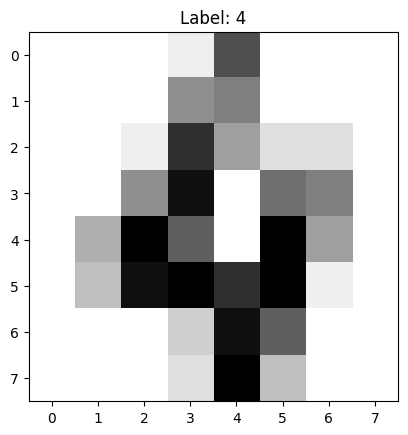

Model Accuracy: 0.975
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


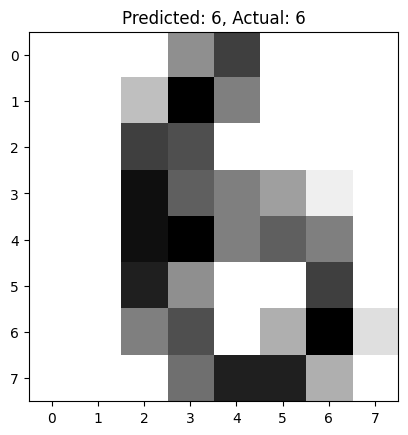

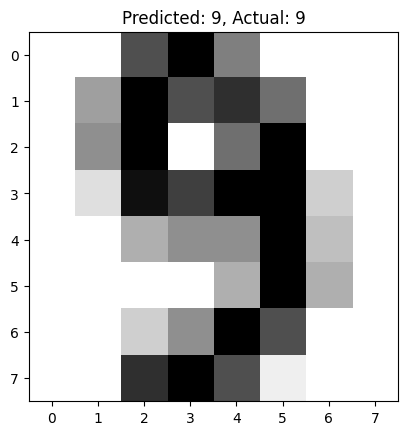

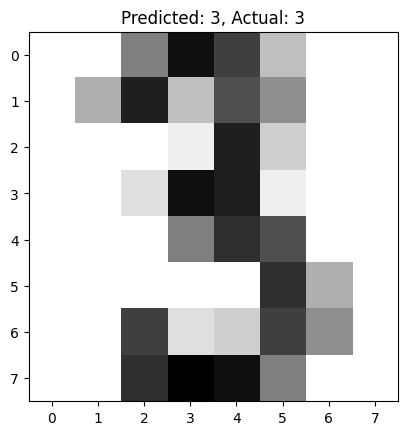

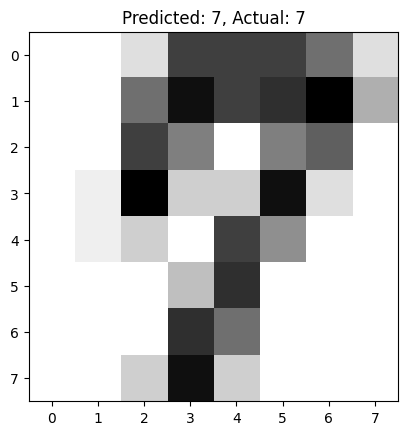

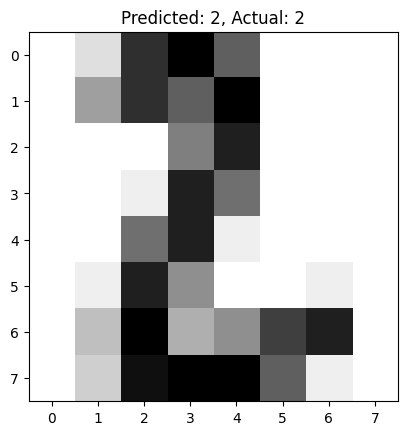

In [2]:
# Assignment 1: Recognize a Digit using Machine Learning

# Name: Preetirekha Das
# Roll NO: 232050007010

# --------------------
# Step 1: Import Libraries
# numpy is for numerical operations, matplotlib for plotting, and sklearn for ML functions
# In this step, we import the Python libraries required for our project:
# **numpy** → For numerical operations, such as handling arrays.
# **matplotlib** → For plotting and visualizing the digit images.
# **sklearn (scikit-learn)** → A machine learning library that provides datasets, models, and evaluation tools.

# We specifically import:
# `datasets` → To load the digits dataset.
# `metrics` → To evaluate the performance of our model.
# `train_test_split` → To split data into training and testing sets.
# `LogisticRegression` → The machine learning algorithm we will use for classification.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# --------------------
# Step 2: Load the Digits Dataset
# This dataset contains images of hand-written digits (0–9), 8x8 pixels each.
# We use the `load_digits()` function from scikit-learn, which contains:
# 1,797 images of handwritten digits (0–9).
# Each image is 8x8 pixels, in grayscale.
# A target label (actual digit value) for each image.

# We also print the **shape** of the data to understand its structure:
# `digits.images.shape` → (number of samples, image height, image width)
# `digits.target.shape` → (number of labels)

digits = datasets.load_digits()
print("Shape of images data:", digits.images.shape)  # (n_samples, 8, 8)
print("Shape of target labels:", digits.target.shape)  # (n_samples,)

# --------------------
# Step 3: Visualize Some Digits
# Show first 5 images with their labels
# Before training, it’s important to understand our data visually.
# We display the first 5 images with their corresponding labels using `matplotlib`.
# This helps confirm that the dataset is loaded correctly and that each image matches its label.

for i in range(5):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
    plt.title(f"Label: {digits.target[i]}")
    plt.show()

# --------------------
# Step 4: Prepare the Data
# We need to flatten each 8x8 image into a 1D array of 64 pixels for ML model input
# Machine learning models work with **1D arrays**, but our images are **2D (8x8)**.
# So we **flatten** each image into a vector of length 64 (8 × 8 = 64 pixels).
# `reshape((len(digits.images), -1))` → Converts the dataset into shape `(samples, features)`.
# We also store the target values (`y`) separately.

X = digits.images.reshape((len(digits.images), -1))  # shape becomes (n_samples, 64)
y = digits.target  # Labels (0–9)

# --------------------
# Step 5: Split into Training and Testing Sets
# Training set = 80%, Test set = 20%
# We divide our data into:
# **Training set (80%)** → For training the model.
# **Testing set (20%)** → For evaluating how well the model works on unseen data.
# We use `train_test_split()` with `random_state=42` to get the same split every time.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------
# Step 6: Create and Train the Model
# We use Logistic Regression as a classifier
# We choose **Logistic Regression** as our classification algorithm.
# It works well for multi-class problems like digit recognition.
# `max_iter=1000` is set to allow enough iterations for the algorithm to converge.

# We train the model using:
# python
# model.fit(X_train, y_train)

model = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence
model.fit(X_train, y_train)

# --------------------
# Step 7: Make Predictions
# After training, we test the model on the unseen test set using:
# python
# y_pred = model.predict(X_test)
# This gives us the predicted digit labels for each image in the test set.

y_pred = model.predict(X_test)

# --------------------
# Step 8: Evaluate the Model
# We measure the model’s accuracy using:
# python
# metrics.accuracy_score(y_test, y_pred)
# Accuracy = (Number of correct predictions) / (Total predictions)
# We also generate a Confusion Matrix to see exactly which digits the model is misclassifying.

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Confusion Matrix (to see where model makes mistakes)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# --------------------
# Step 9: Visualize Some Predictions
# Show first 5 test images with predicted & actual labels
# To confirm the predictions, we display the first 5 images from the test set along with:
# Predicted label (model output)
# Actual label (ground truth)
# This helps us visually check if the model is making correct predictions.

for i in range(5):
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.show()
